In [1]:
import sys
sys.path.append('/home/scc/sergio.zanotto/.local/lib/python3.10/site-packages')
sys.path.append('/home/scc/sergio.zanotto/.local/bin')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

##load the new calculated dataset 

In [3]:
df = pd.read_csv("/home/scc/sergio.zanotto/bin/HumanvsAI/lingfeat/Official_AivsHUman1.csv", encoding="UTF-8")

In [4]:
len(df["Source"])

71027

In [5]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.dpi'] = 300

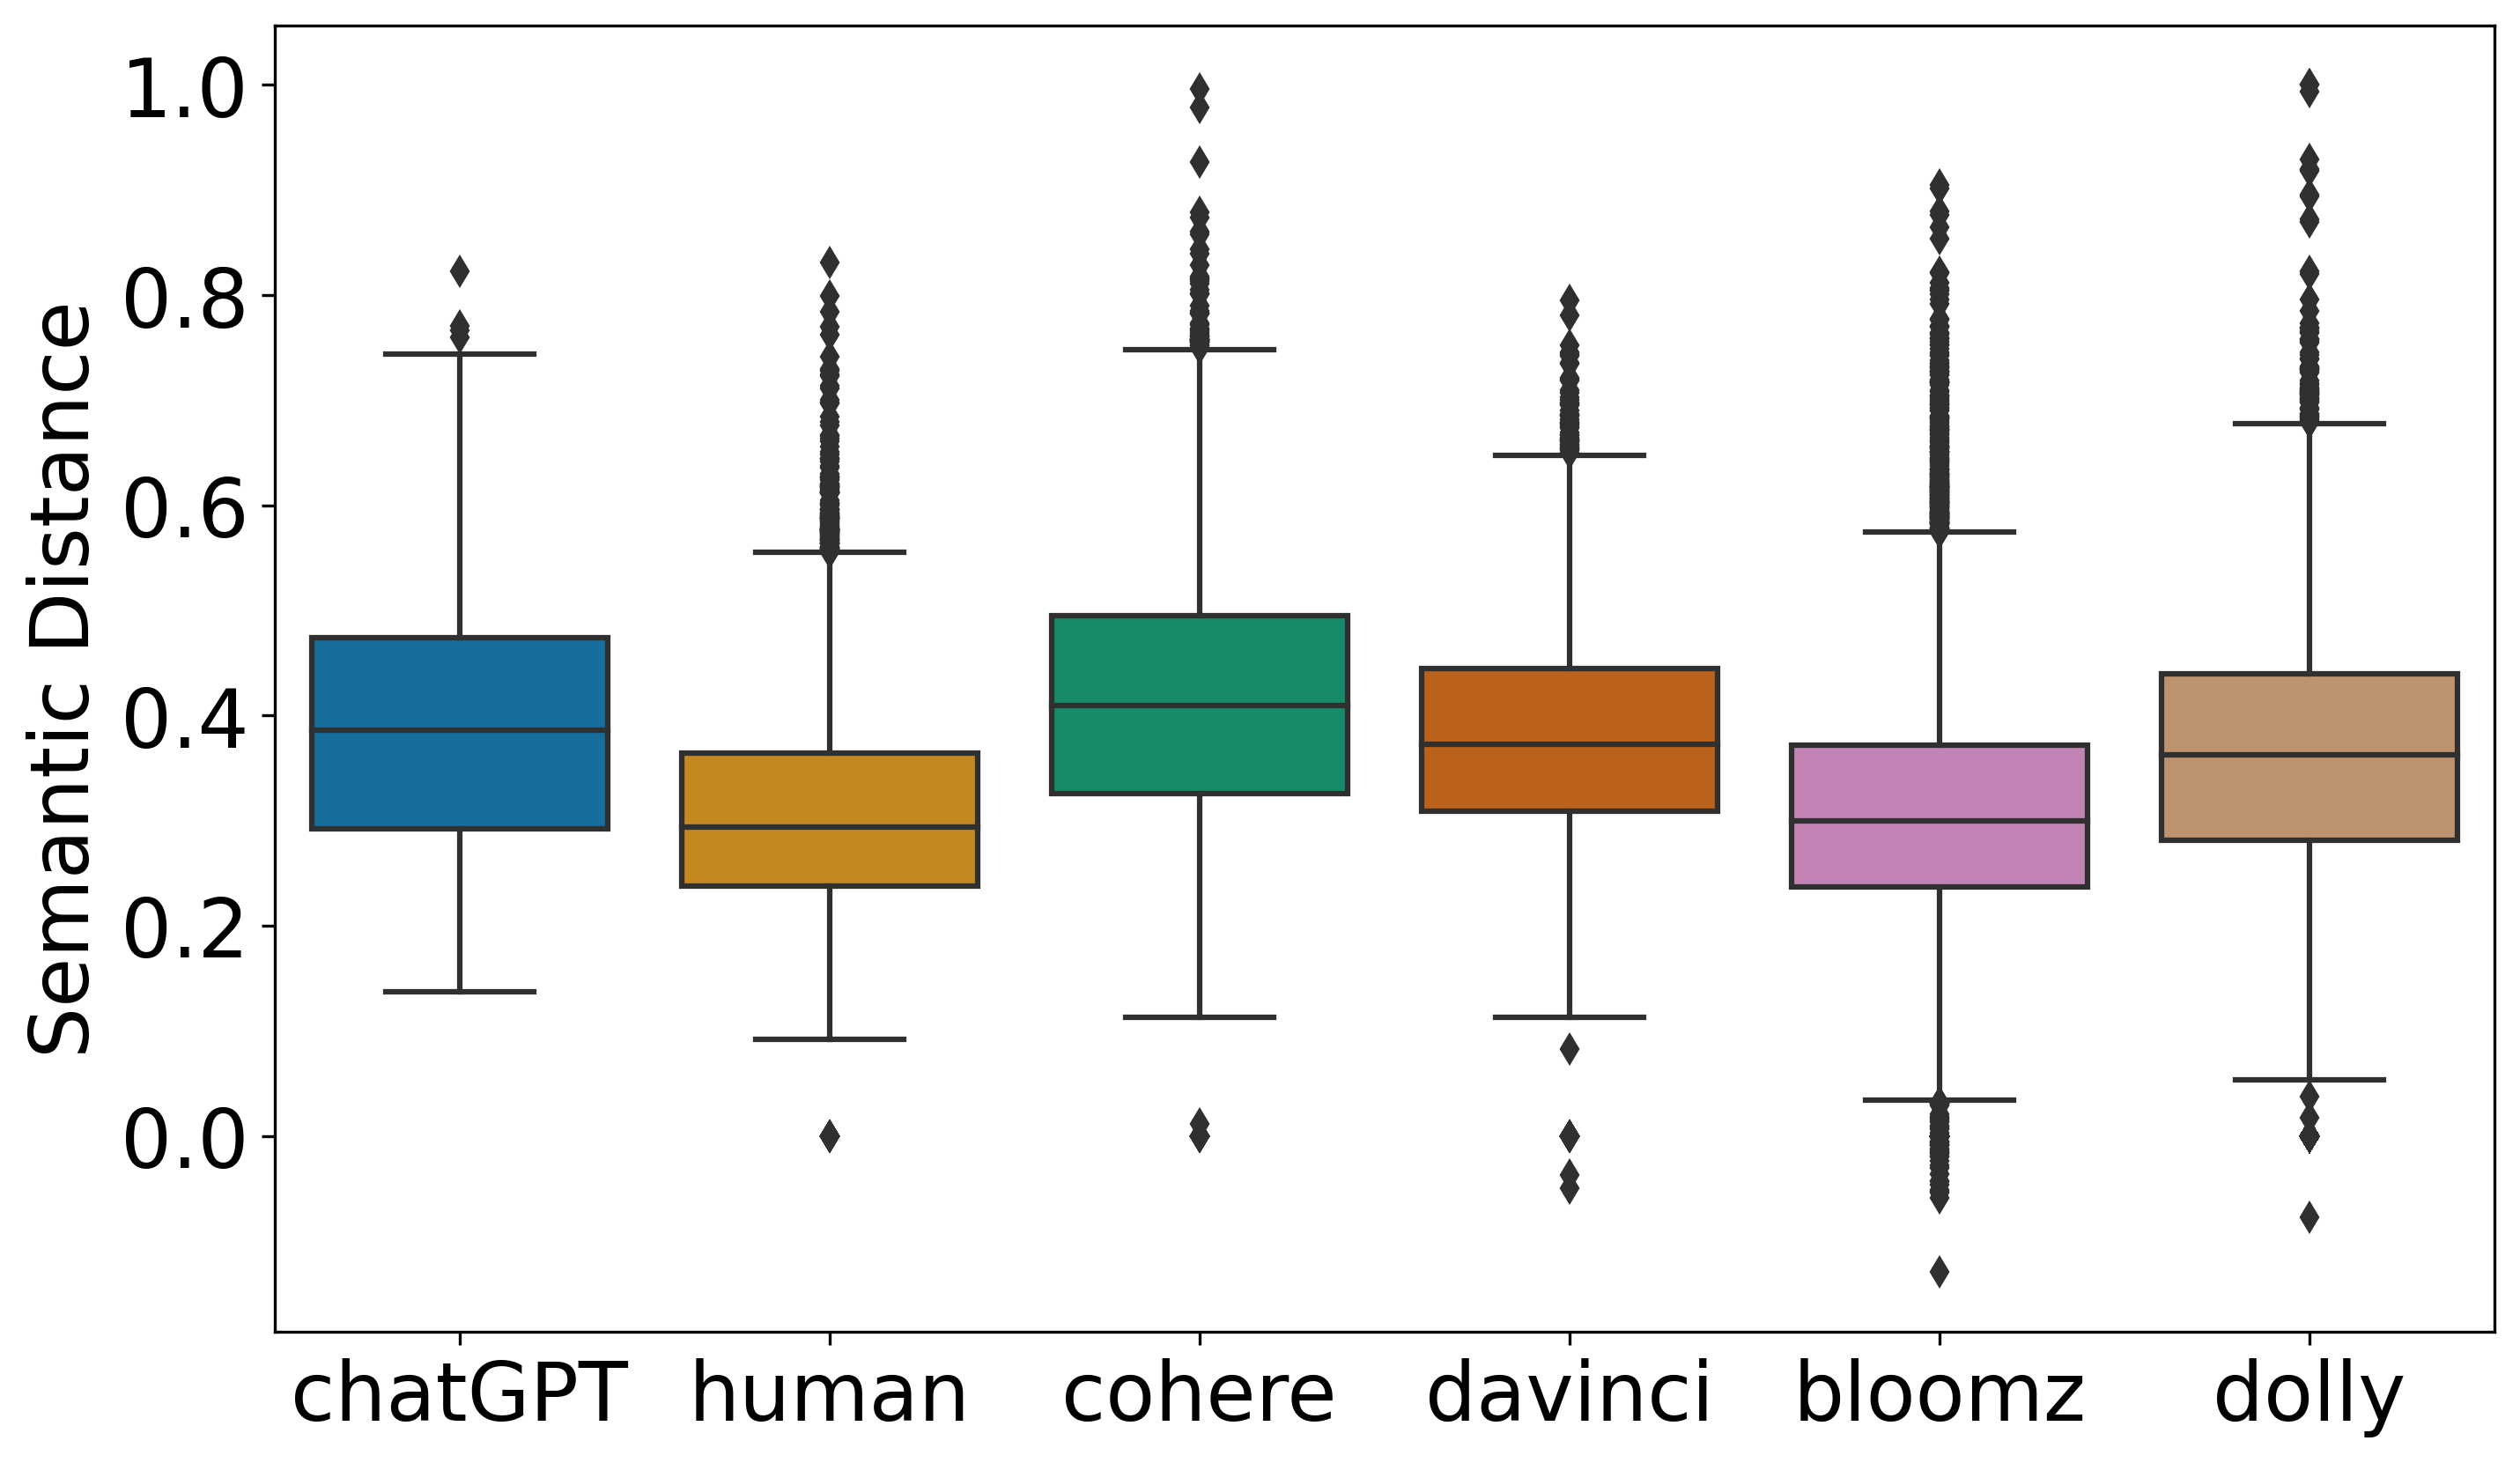

In [6]:

# Extract unique models
unique_models = df['Model'].unique()

# Use a colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind", len(unique_models))

# Map models to colors using the colorblind-friendly palette
model_to_color = {model: colorblind_palette[i % len(colorblind_palette)] for i, model in enumerate(unique_models)}

# Create a figure
plt.figure(figsize=(10, 6))

# Create a boxplot with the adjusted color palette
sns.boxplot(x='Model', y='Semantic_Distance_Sentences', data=df, palette=model_to_color)

# Adjust the title and labels with a larger font size
#plt.title('Semantic Distance: Pair-wise Sentence Comparison by Model', fontsize=18)
plt.ylabel('Semantic Distance')
plt.xlabel('')
plt.xticks()
plt.yticks()

# Enable grid lines on the y-axis
plt.grid(False, axis='y')

# Save and show the plot
plt.tight_layout()
plt.savefig('semantic_distance_by_model_aggregated_sentences.pdf')
plt.show()

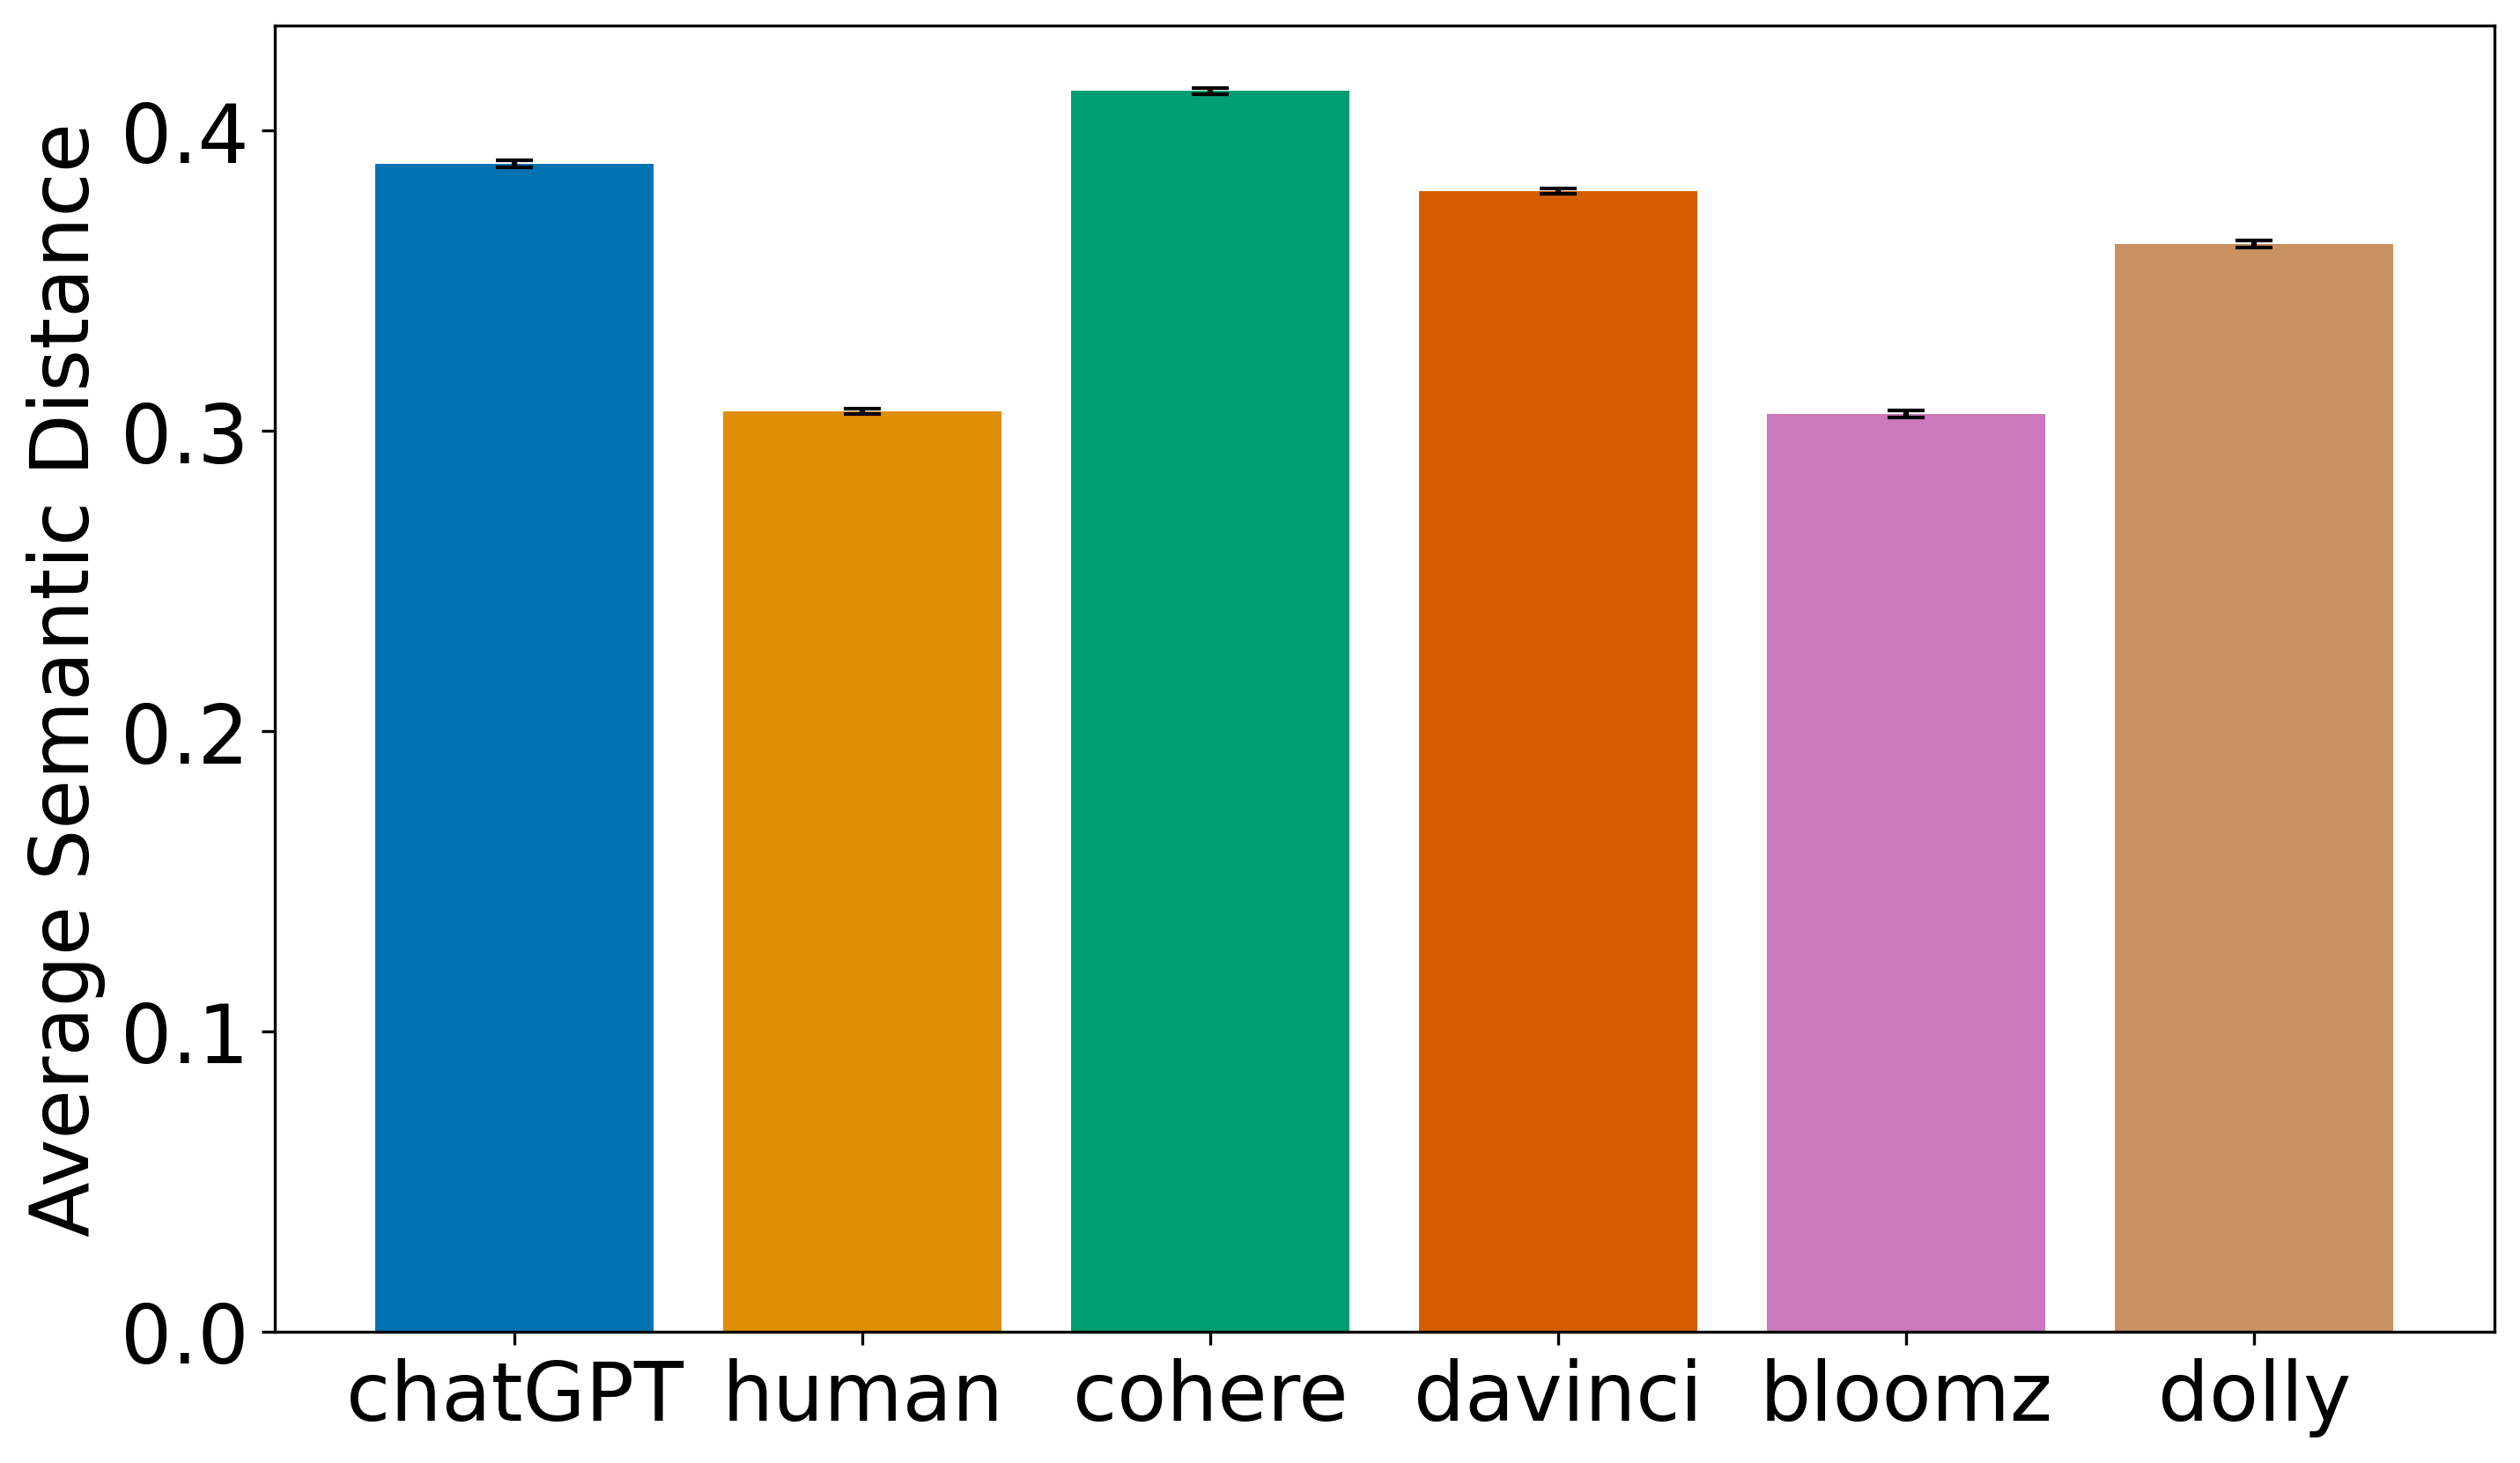

In [7]:
# Calculate the average Syntactic Depth (here Semantic Distance) and standard error for each model
avg_syntactic_depth_per_model = df.groupby('Model')['Semantic_Distance_Sentences'].mean().reindex(unique_models)
se_syntactic_depth_per_model = df.groupby('Model')['Semantic_Distance_Sentences'].sem().reindex(unique_models)

# Use a colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind", len(unique_models))

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting with error bars using the colorblind-friendly palette
plt.bar(unique_models, avg_syntactic_depth_per_model, yerr=se_syntactic_depth_per_model, 
        color=[colorblind_palette[i % len(colorblind_palette)] for i in range(len(unique_models))], capsize=5)

# Adjust the title and labels with a larger font size
#plt.title('Semantic Distance: Pair-wise Sentence Comparison by Model', fontsize=18)
plt.ylabel('Average Semantic Distance')
plt.xlabel('')
plt.xticks()
plt.yticks()

plt.grid(False)

# Save and show the plot
plt.tight_layout()
plt.savefig('average_semantic_depth_general.pdf')
plt.show()

In [8]:
ratio_list = (df['t_uword'] / df['t_word']).tolist()


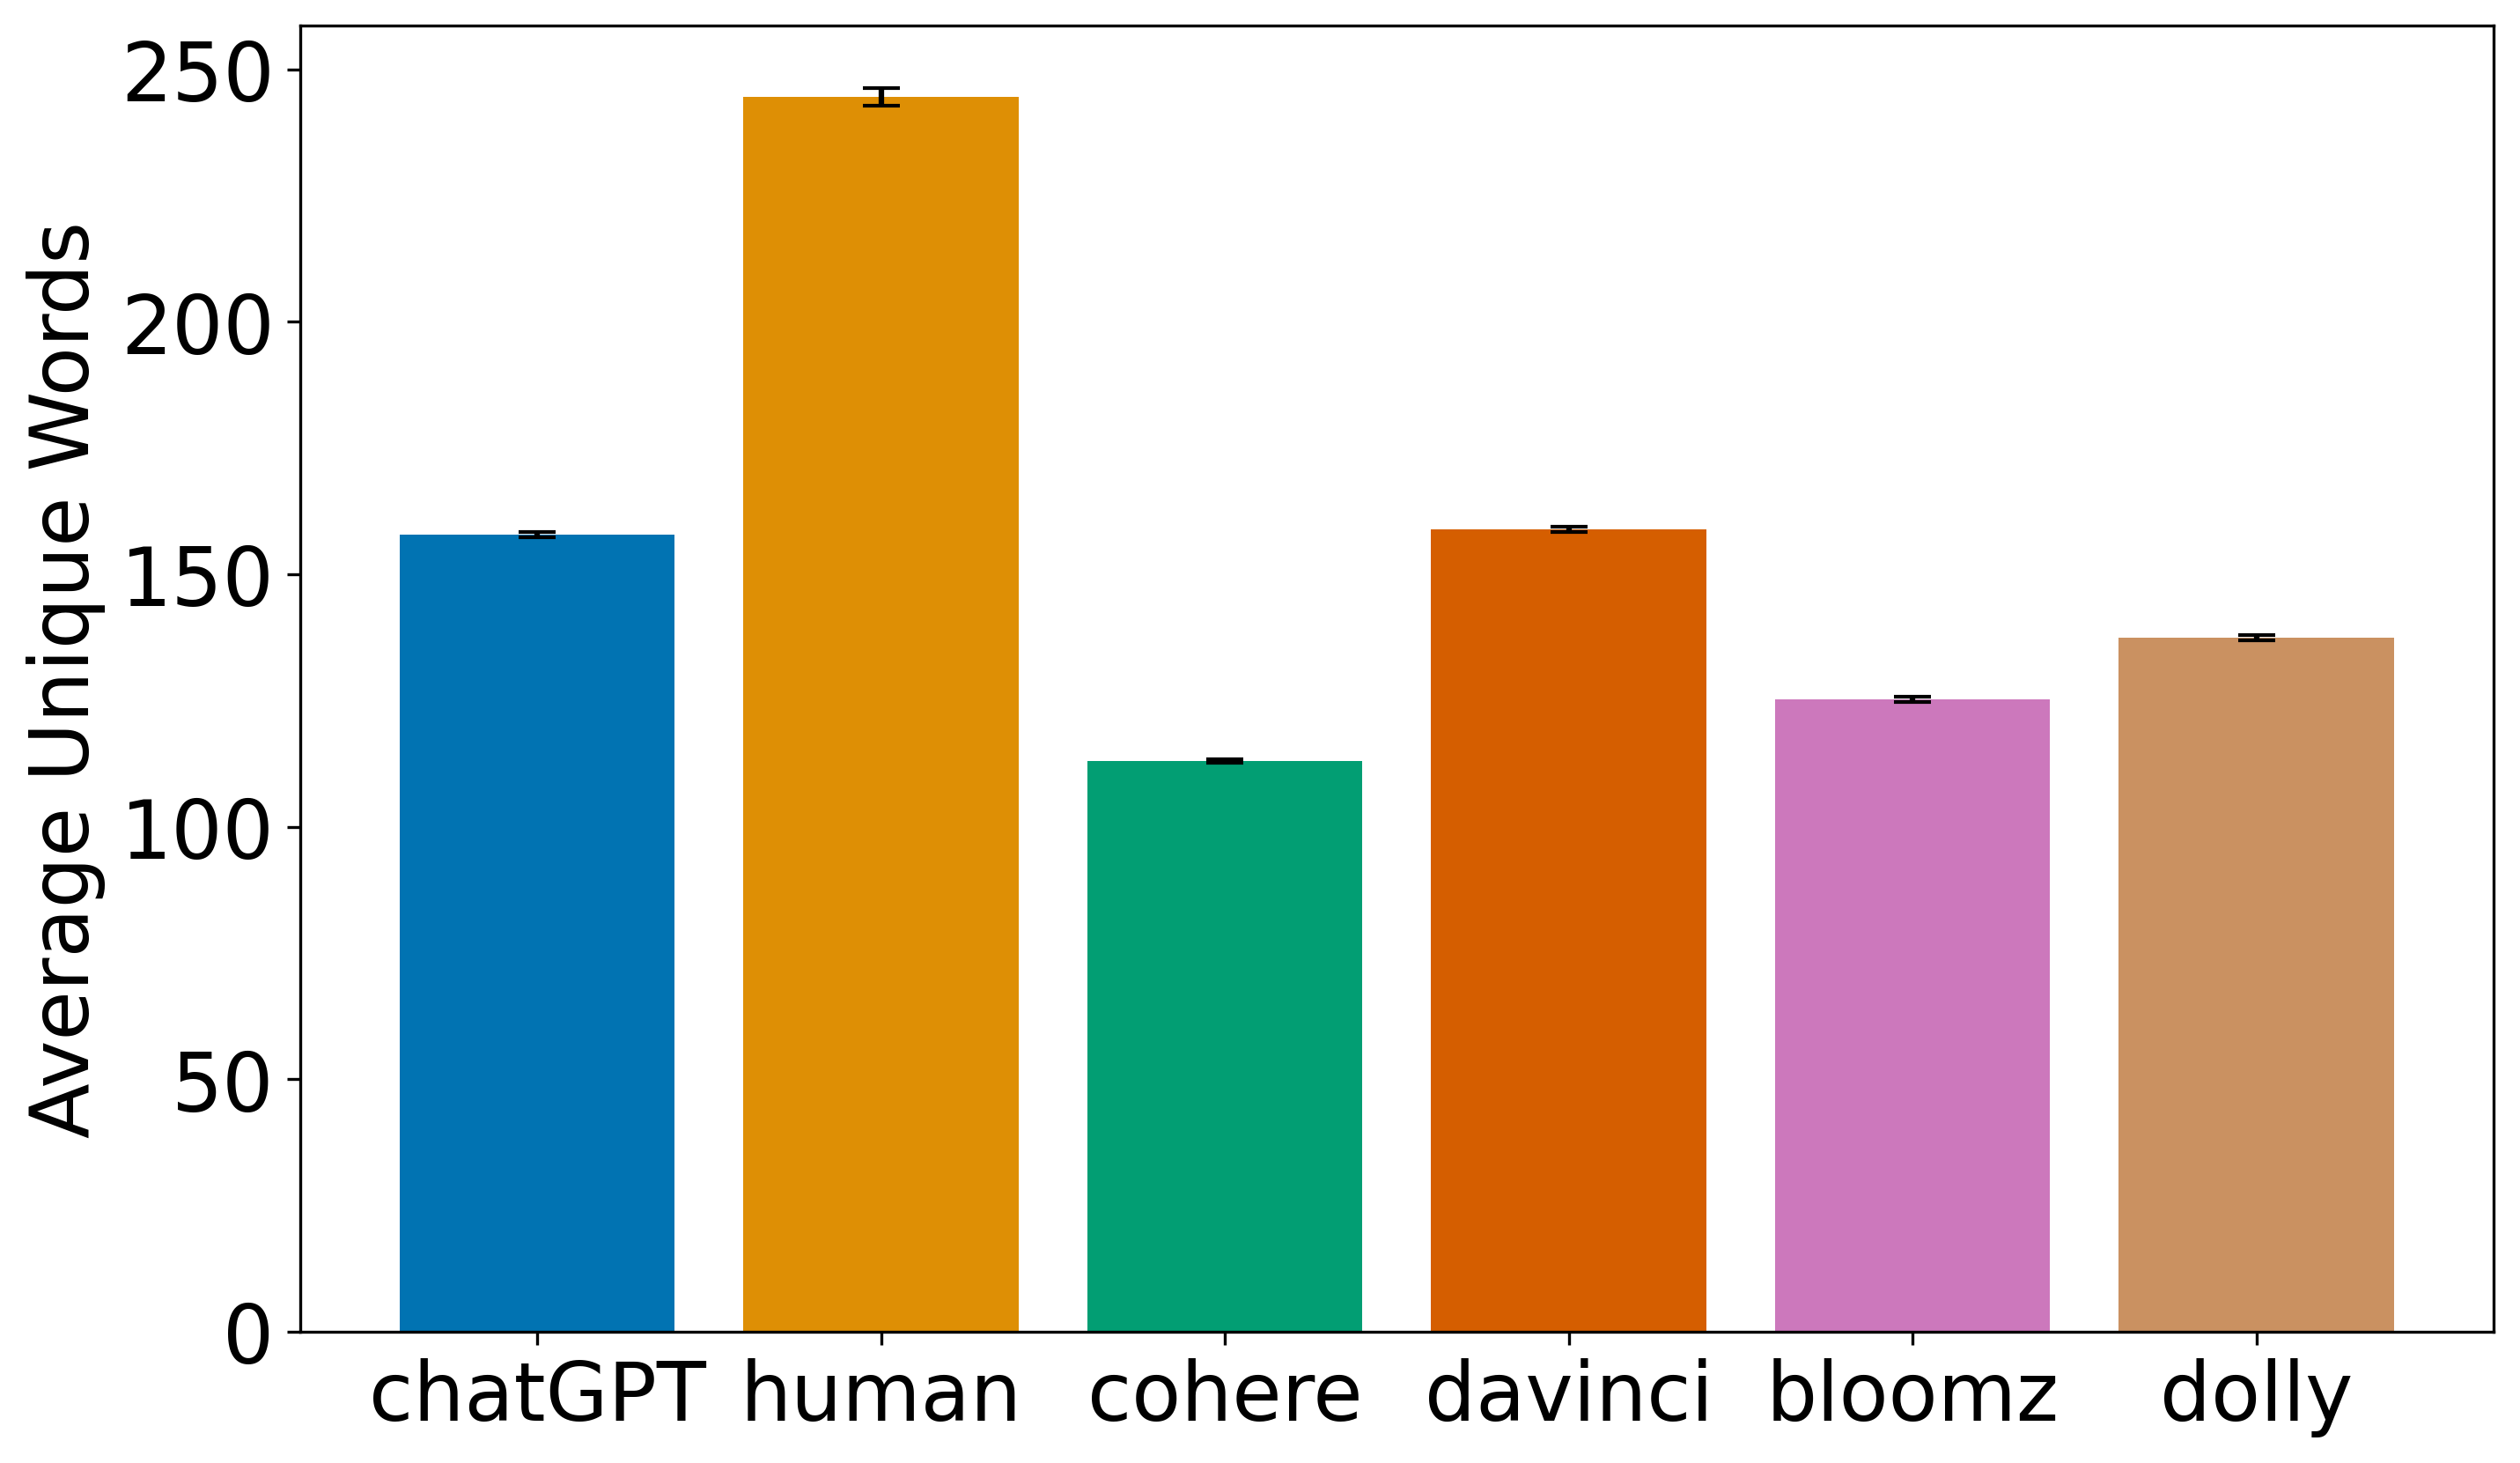

In [9]:
# Calculate the average Syntactic Depth and standard error for each model
avg_unique_word_per_model = df.groupby('Model')['t_uword'].mean().reindex(unique_models)
se_unique_word_per_model = df.groupby('Model')['t_uword'].sem().reindex(unique_models)

# Use a colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind", len(unique_models))

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting with error bars
plt.bar(unique_models, avg_unique_word_per_model, yerr=se_unique_word_per_model, 
        color=[colorblind_palette[i % len(colorblind_palette)] for i in range(len(unique_models))], capsize=5)

#plt.title('Average Unique Words per model',fontsize=18)
plt.ylabel('Average Unique Words')
#plt.xlabel('Model',fontsize=14)
plt.xticks()
plt.yticks()
plt.grid(False)

# Save the plot
plt.tight_layout()
plt.savefig('average_average_unique_words.pdf')
plt.show()

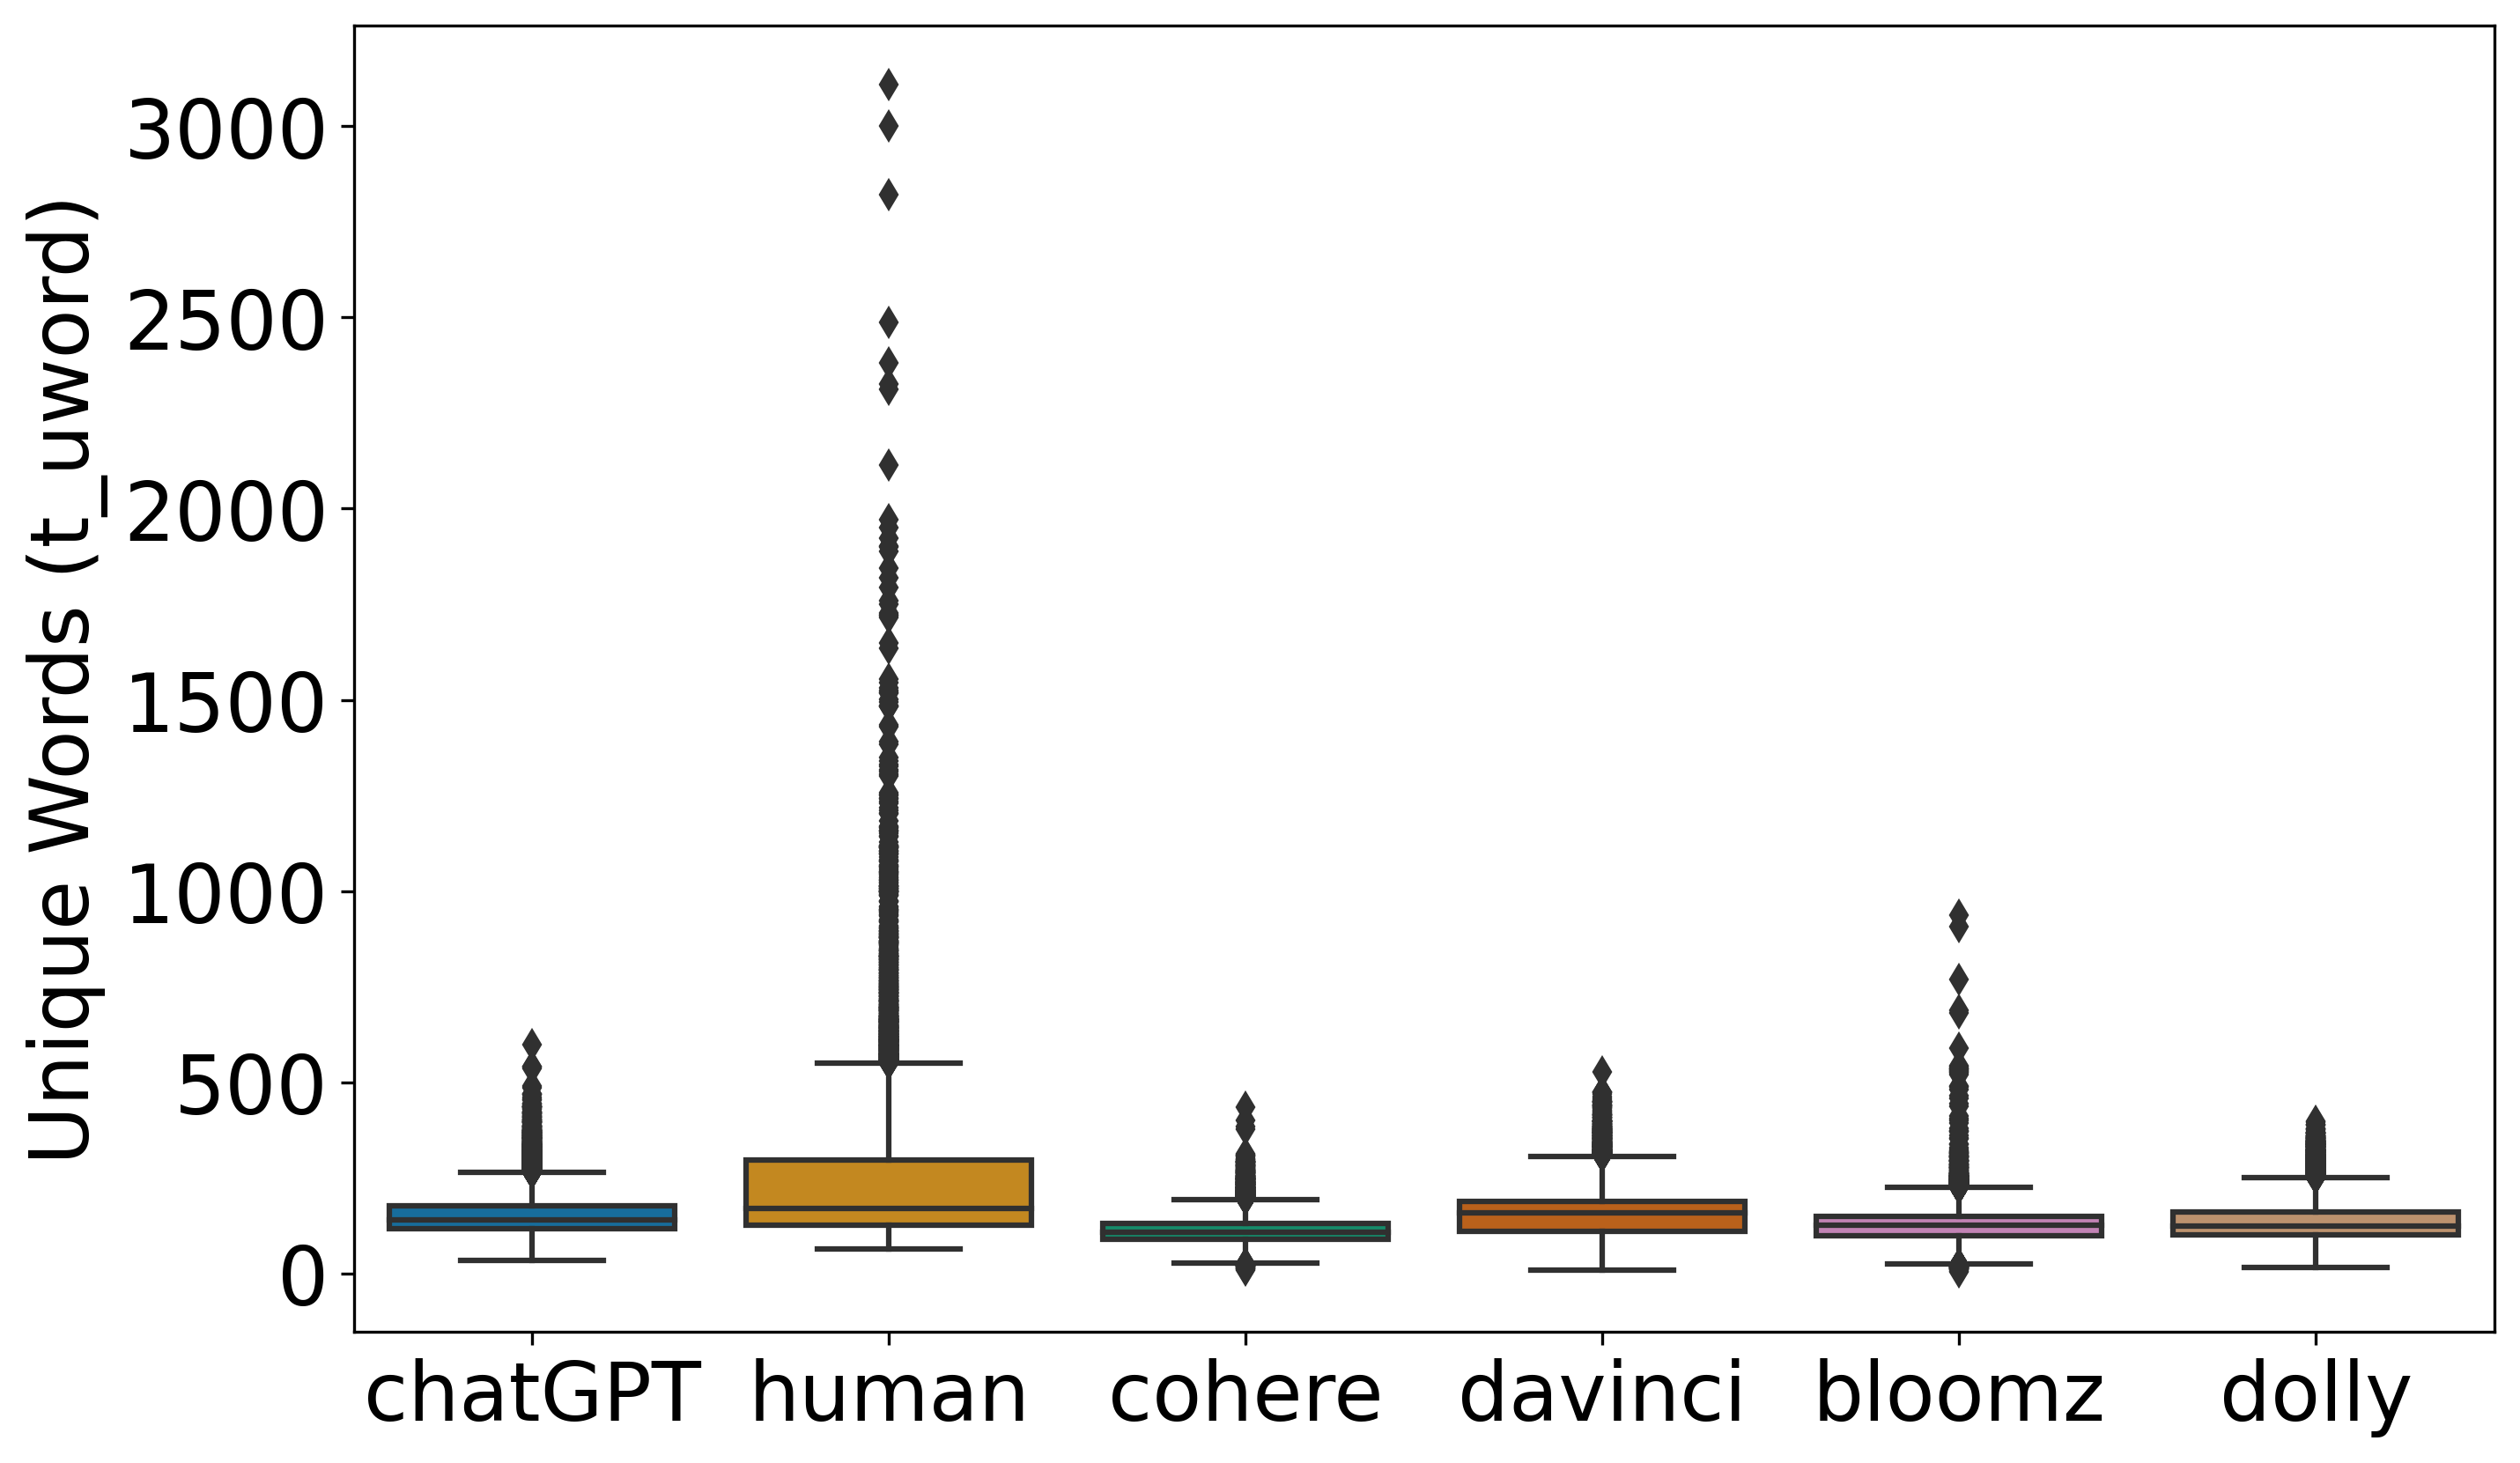

In [10]:
# Define the specific order of models and use a colorblind-friendly palette
model_order = ['chatGPT', 'human', 'cohere', 'davinci', 'bloomz', 'dolly']
colorblind_palette = sns.color_palette("colorblind", len(model_order))

# Create a figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='Model', y='t_uword', data=df, order=model_order, palette=colorblind_palette)

# Add title and labels with larger font size
#plt.title('Distribution of Unique Words by Model', fontsize=18)
plt.ylabel('Unique Words (t_uword)')
plt.xlabel('')
plt.xticks()
plt.yticks()

# Save and show the plot
plt.tight_layout()
plt.savefig('boxplot_by_model_uniquewords.pdf')
plt.show()

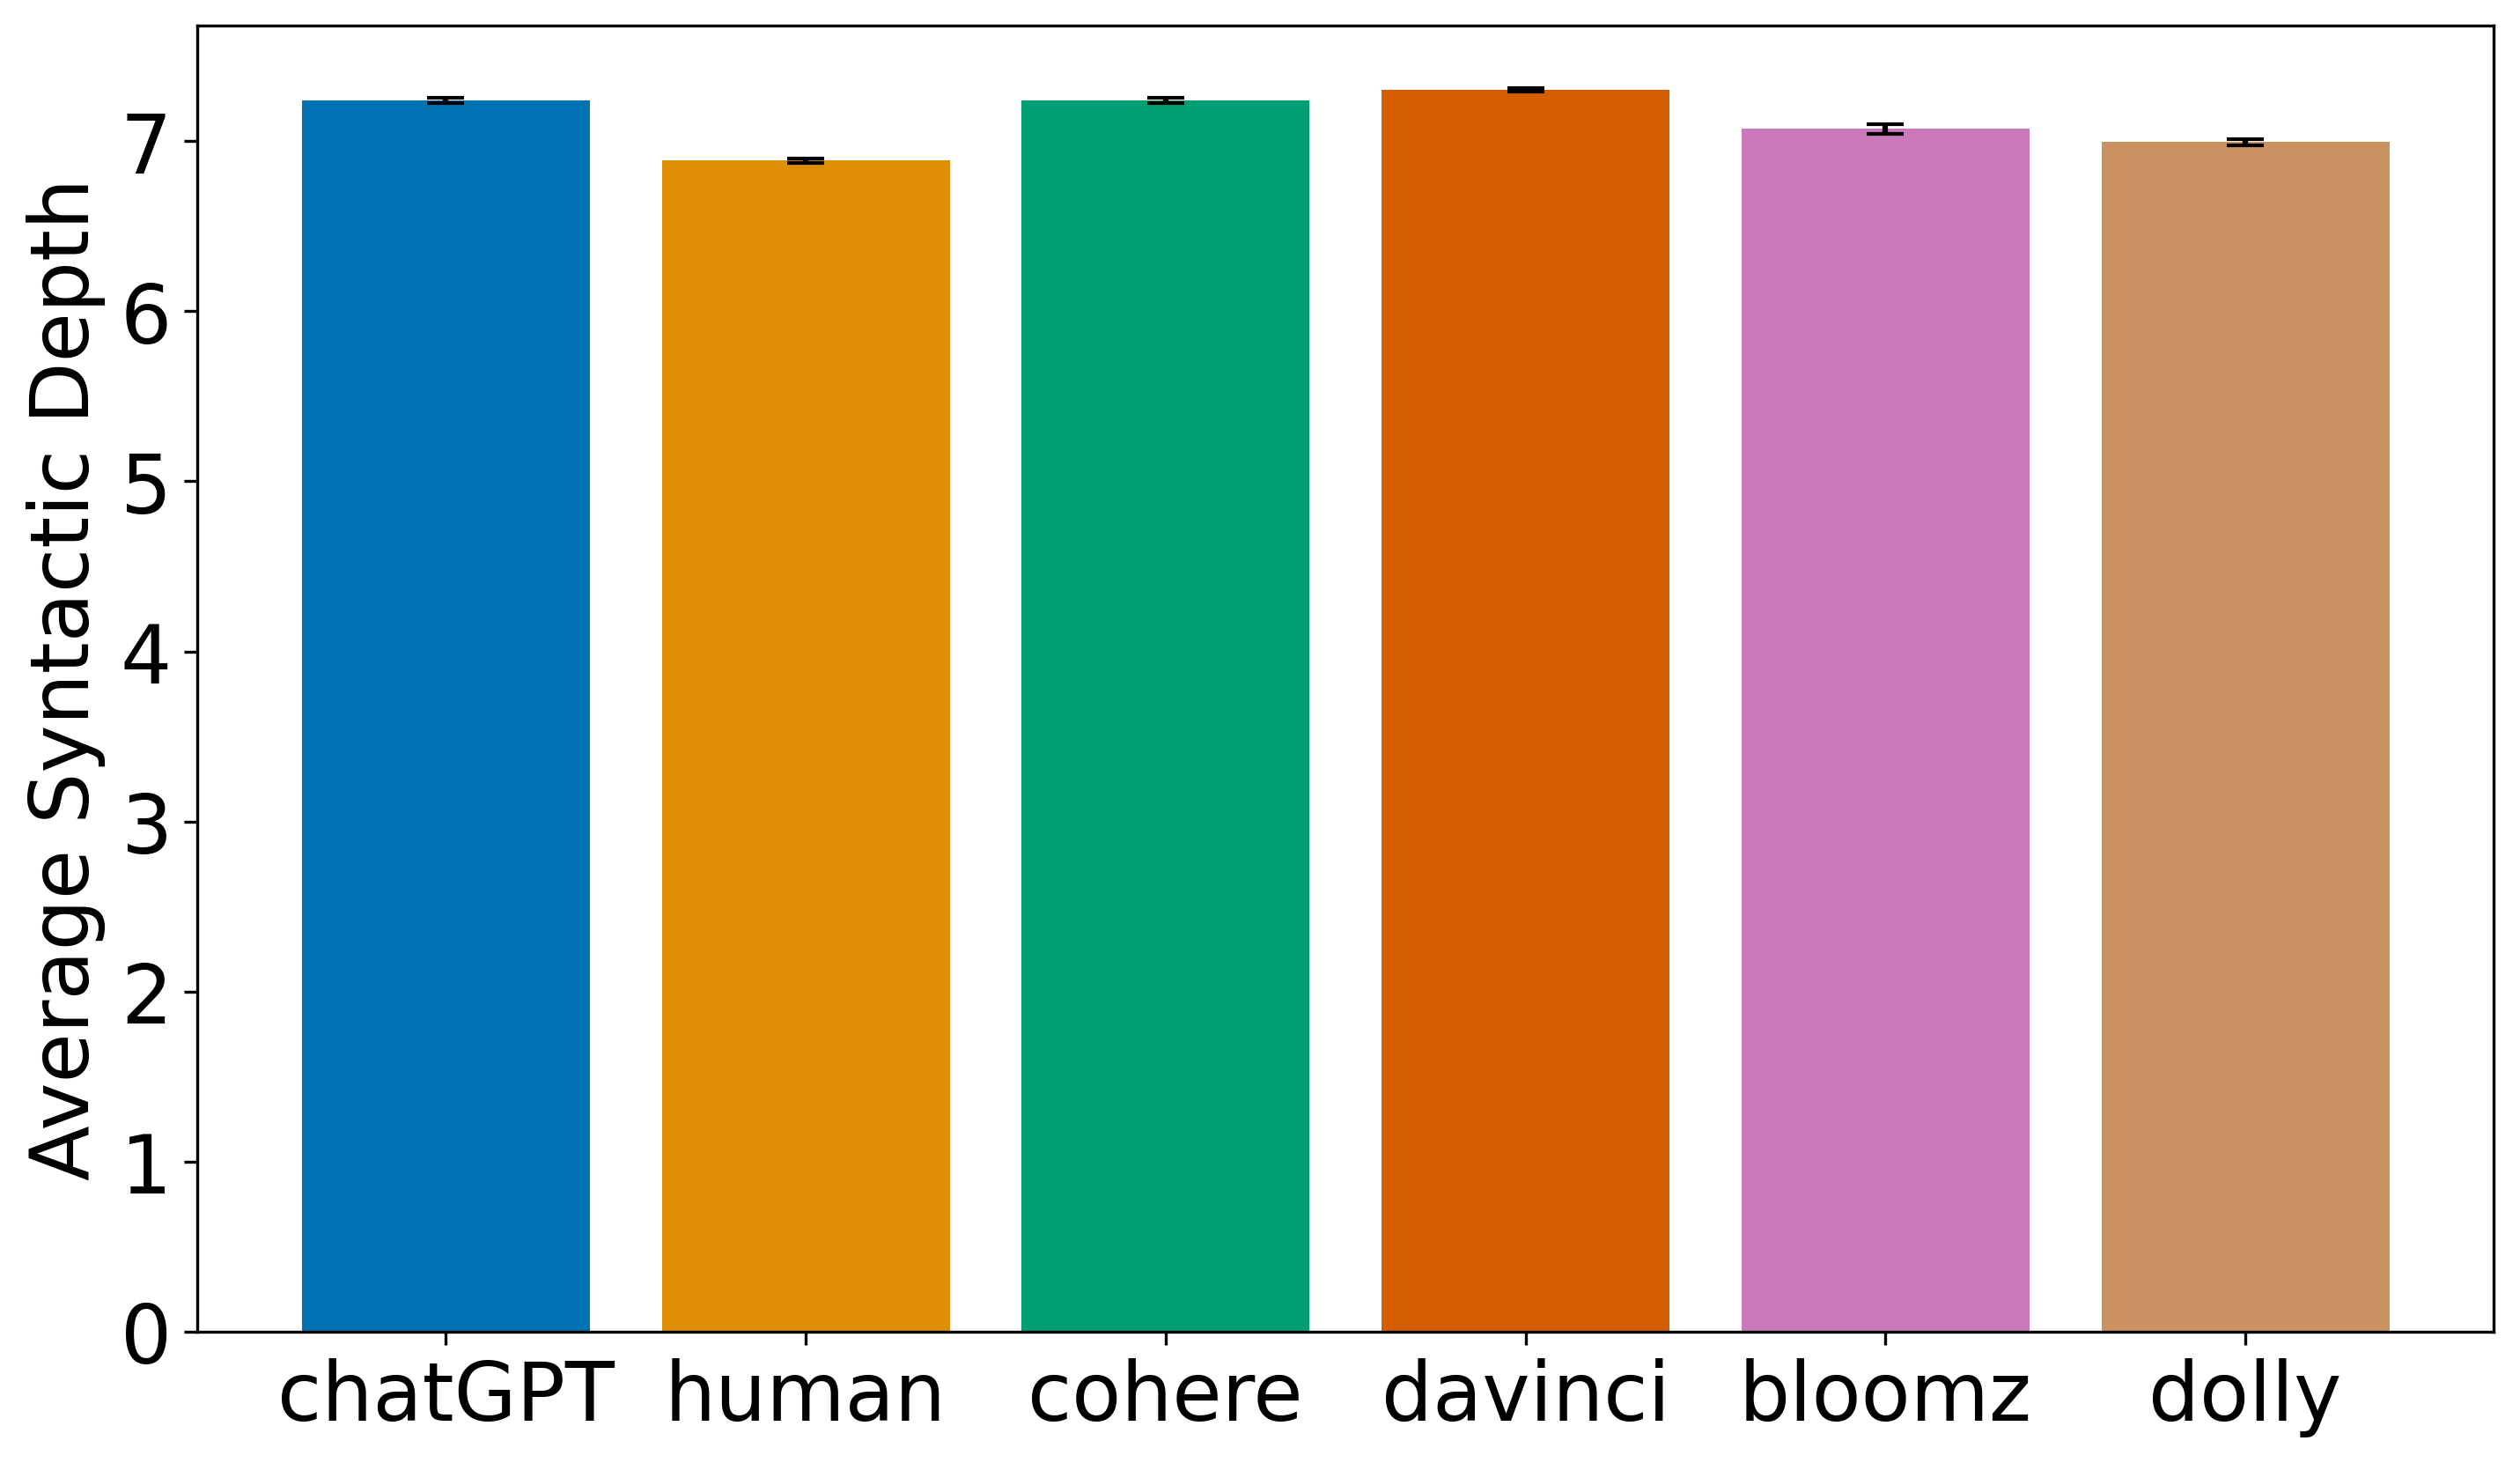

In [11]:
# Calculate the average Syntactic Depth and standard error for each model
avg_syntactic_depth_per_model = df.groupby('Model')['Syntactic_Depth'].mean().reindex(unique_models)
se_syntactic_depth_per_model = df.groupby('Model')['Syntactic_Depth'].sem().reindex(unique_models)

# Use a colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind", len(unique_models))

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting with error bars
plt.bar(unique_models, avg_syntactic_depth_per_model, yerr=se_syntactic_depth_per_model, 
        color=[colorblind_palette[i % len(colorblind_palette)] for i in range(len(unique_models))], capsize=5)

# Make font size bigger
#plt.title('Average Syntactic Depth Across All Sources', fontsize=18)
plt.ylabel('Average Syntactic Depth')
#plt.xlabel('Model')
plt.xticks()
plt.yticks()

plt.grid(False)

# Save the plot
plt.tight_layout()
plt.savefig('average_syntactic_depth_general.pdf')
plt.show()

In [12]:
# List of unique models
unique_models = ['chatGPT', 'human', 'cohere', 'davinci', 'bloomz', 'dolly']

# Calculate average and standard error for syntactic depth per model
avg_syntactic_depth_per_model = df.groupby('Model')['Syntactic_Depth'].mean().reindex(unique_models)
se_syntactic_depth_per_model = df.groupby('Model')['Syntactic_Depth'].sem().reindex(unique_models)

# Create DataFrame for comparison between "human" and other models
syntactic_depth_comparison = pd.DataFrame({
    'Average Syntactic Depth': avg_syntactic_depth_per_model,
    'Standard Error': se_syntactic_depth_per_model
})

# Display "human" vs each other model
human_vs_models = syntactic_depth_comparison.loc[['human']].append(
    syntactic_depth_comparison.drop('human')
)

print(human_vs_models)

         Average Syntactic Depth  Standard Error
Model                                           
human                   6.886648        0.012309
chatGPT                 7.240371        0.013369
cohere                  7.239870        0.016951
davinci                 7.303034        0.011588
bloomz                  7.071857        0.028751
dolly                   6.994711        0.019889


/tmp/ipykernel_45395/2449592984.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  human_vs_models = syntactic_depth_comparison.loc[['human']].append(


In [35]:
import scipy.stats as stats

# Prepare the data for Kruskal-Wallis test
models = df['Model'].unique()  # Assuming 'Model' column contains model names
df['Syntactic_Depth'] = df.groupby('Model')['Syntactic_Depth'].transform(lambda x: x.fillna(x.mean()))
# Extract the values for each model for each metric
semantic_distances = [df[df['Model'] == model]['Semantic_Distance_Sentences'] for model in models]
syntactic_depths = [df[df['Model'] == model]['Syntactic_Depth'] for model in models]
unique_words = [df[df['Model'] == model]['t_uword'] for model in models]

# Kruskal-Wallis test for Semantic Distance Sentences
kw_semantic_distance = stats.kruskal(*semantic_distances)
print(f'Kruskal-Wallis test for Semantic Distance Sentences: H-statistic={kw_semantic_distance.statistic}, p-value={kw_semantic_distance.pvalue}')

# Kruskal-Wallis test for Syntactic Depth
kw_syntactic_depth = stats.kruskal(*syntactic_depths)
print(f'Kruskal-Wallis test for Syntactic Depth: H-statistic={kw_syntactic_depth.statistic}, p-value={kw_syntactic_depth.pvalue}')

# Kruskal-Wallis test for Unique Words
kw_unique_words = stats.kruskal(*unique_words)
print(f'Kruskal-Wallis test for Unique Words: H-statistic={kw_unique_words.statistic}, p-value={kw_unique_words.pvalue}')


Kruskal-Wallis test for Semantic Distance Sentences: H-statistic=8548.755955495493, p-value=0.0
Kruskal-Wallis test for Syntactic Depth: H-statistic=1246.646325624285, p-value=2.3102997857963263e-267
Kruskal-Wallis test for Unique Words: H-statistic=11575.71483663756, p-value=0.0


In [38]:
import scikit_posthocs as sp

# Post-hoc pairwise comparisons for Semantic Distance
dunn_semantic_distance = sp.posthoc_dunn(df, val_col='Semantic_Distance_Sentences', group_col='Model', p_adjust='bonferroni')
print("Dunn's Test for Semantic Distance Sentences:")
print(dunn_semantic_distance)

# Post-hoc pairwise comparisons for Unique Words
dunn_unique_words = sp.posthoc_dunn(df, val_col='t_uword', group_col='Model', p_adjust='bonferroni')
print("\nDunn's Test for Unique Words:")
print(dunn_unique_words)

# Post-hoc pairwise comparisons for Syntactic Depth
dunn_syntactic_depth = sp.posthoc_dunn(df, val_col='Syntactic_Depth', group_col='Model', p_adjust='bonferroni')
print("\nDunn's Test for Syntactic Depth:")
print(dunn_syntactic_depth)


Dunn's Test for Semantic Distance Sentences:
           bloomz       chatGPT         cohere       davinci          dolly  \
bloomz   1.000000  0.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00   
chatGPT  0.000000  1.000000e+00   1.497023e-48  2.411483e-02   4.015407e-46   
cohere   0.000000  1.497023e-48   1.000000e+00  9.157666e-71  1.820065e-183   
davinci  0.000000  2.411483e-02   9.157666e-71  1.000000e+00   1.722273e-28   
dolly    0.000000  4.015407e-46  1.820065e-183  1.722273e-28   1.000000e+00   
human    0.002787  0.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00   

            human  
bloomz   0.002787  
chatGPT  0.000000  
cohere   0.000000  
davinci  0.000000  
dolly    0.000000  
human    1.000000  

Dunn's Test for Unique Words:
                bloomz        chatGPT         cohere        davinci  \
bloomz    1.000000e+00  9.203710e-307  5.245563e-150   0.000000e+00   
chatGPT  9.203710e-307   1.000000e+00   0.000000e+00   1.551351e-01   
cohere   5.245563